In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\Nat_Gas.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_6744\518563767.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)


,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


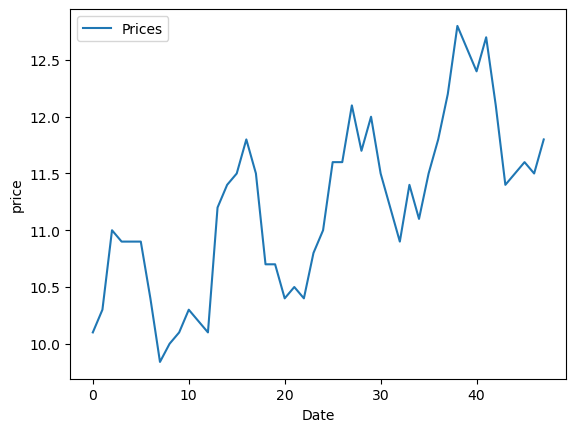

In [6]:
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]


df.plot()
plt.xlabel('Date')
plt.ylabel('price')
plt.legend();

df.describe()

In [17]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     --- --------------------------------- 30.7/314.6 kB 445.2 kB/s eta 0:00:01
     ---------- -------------------------- 92.2/314.6 kB 751.6 kB/s eta 0:00:01
     ---------------- ------------------- 143.4/314.6 kB 950.9 kB/s eta 0:00:01
     ----------------------- ------------ 204.8/314.6 kB 958.4 kB/s eta 0:00:01
     ----------------------------- ------ 256.0/314.6 kB 983.0 kB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting require

In [19]:
import yfinance as yf

start_date = '2024-01-01'
end_date = '2024-09-30'

# Choose Natural Gas ETF or Commodity Ticker
# Example using ETF for Natural Gas: UNG (United States Natural Gas Fund)
natgas_data = yf.download('UNG', start=start_date, end=end_date)

# Print the fetched data
print(natgas_data)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-01-02  20.959999  21.040001  20.440001  20.760000  20.760000   4600875
2024-01-03  21.680000  22.040001  21.280001  21.760000  21.760000   6721225
2024-01-04  22.879999  23.200001  22.200001  23.080000  23.080000  11130100
2024-01-05  21.920000  23.520000  21.879999  23.360001  23.360001   8500300
2024-01-08  22.240000  24.400000  22.000000  24.040001  24.040001   9126150
2024-01-09  25.559999  27.480000  24.600000  25.920000  25.920000  21309100
2024-01-10  24.799999  25.240000  23.959999  24.600000  24.600000  12598425
2024-01-11  24.559999  26.200001  24.120001  25.160000  25.160000  13421125
2024-01-12  27.080000  27.360001  25.959999  27.280001  27.280001  17415325
2024-01-16  23.959999  24.360001  23.080000  23.120001  23.120001  10722650
2024-01-17  23.040001  23.959999  22.760000  23.280001  23.280001   4653525
2024-01-18  

In [23]:
pip install yfinance statsmodels

Note: you may need to restart the kernel to use updated packages.


In [24]:
import yfinance as yf
import statsmodels.api as sm
from sklearn import linear_model

start_date = '2020-10-31'
end_date = '2024-09-30'

# Fetch historical prices for UNG (Natural Gas)
UNG = yf.download('UNG', start=start_date, end=end_date)

# Calculate daily returns for UNG
R = UNG['Adj Close'].pct_change()[1:]

# Risk-free proxy (assuming BIL is a bond)
BIL = yf.download('BIL', start=start_date, end=end_date)
R_F = BIL['Adj Close'].pct_change()[1:]

# Fetch market data (SPY)
M = yf.download('SPY', start=start_date, end=end_date, progress=False)
M_returns = M['Close'].pct_change()[1:]

# Combine UNG returns, market returns, and risk-free rate into a DataFrame
data = pd.DataFrame({'R': R, 'M': M_returns, 'R_F': R_F})

# Fit the OLS regression model
model = sm.OLS(data['R'] - data['R_F'], sm.add_constant(data['M'])).fit()

# Extract the beta coefficient
Natgas_beta = model.params['M']

# Print the results
print("Natural Gas Beta:", Natgas_beta)
print(model.summary())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Natural Gas Beta: 0.44977391004499606
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.45
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           0.000443
Time:                        23:46:47   Log-Likelihood:                 1475.5
No. Observations:                 817   AIC:                            -2947.
Df Residuals:                     815   BIC:                            -2938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

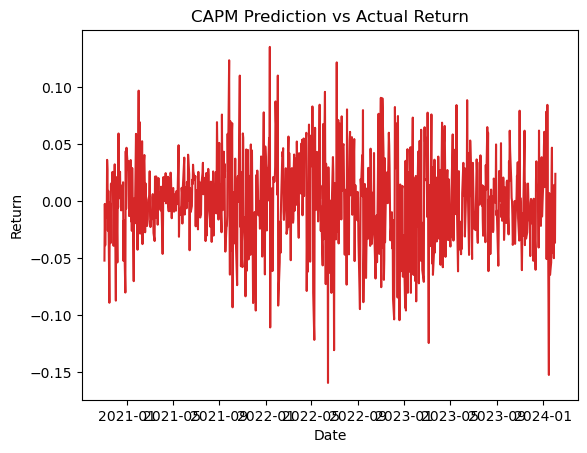

In [31]:
plt.plot(predictions, label='Prediction')
plt.plot(R, label='Actual Return')

plt.xlabel('Date')
plt.ylabel('Return')
plt.title('CAPM Prediction vs Actual Return')

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


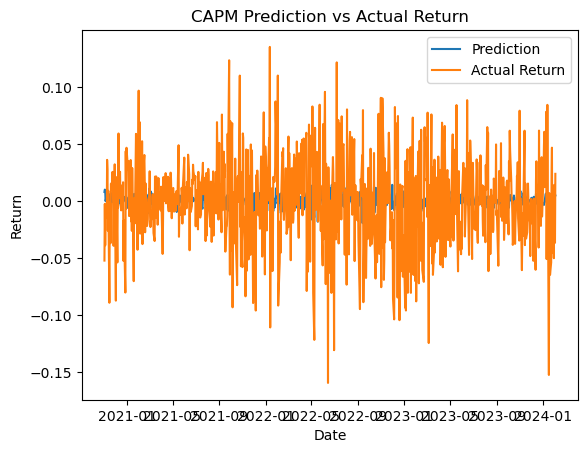

In [32]:
import yfinance as yf
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2020-10-31'
end_date = '2024-09-30'

# Fetch historical prices for UNG (Natural Gas)
UNG = yf.download('UNG', start=start_date, end=end_date)

# Calculate daily returns for UNG
R = UNG['Adj Close'].pct_change()[1:]

# Risk-free proxy (assuming BIL is a bond)
BIL = yf.download('BIL', start=start_date, end=end_date)
R_F = BIL['Adj Close'].pct_change()[1:]

# Fetch market data (SPY)
M = yf.download('SPY', start=start_date, end=end_date, progress=False)
M_returns = M['Close'].pct_change()[1:]

# Combine UNG returns, market returns, and risk-free rate into a DataFrame
data = pd.DataFrame({'R': R, 'M': M_returns, 'R_F': R_F})

# Fit the OLS regression model
model = sm.OLS(data['R'] - data['R_F'], sm.add_constant(data['M'])).fit()

# Extract the beta coefficient
Natgas_beta = model.params['M']

# CAPM equation to predict returns
predictions = R_F + Natgas_beta * (M_returns - R_F)

# Plotting
plt.plot(predictions, label='Prediction')
plt.plot(R, label='Actual Return')
plt.legend()

plt.xlabel('Date')
plt.ylabel('Return')
plt.title('CAPM Prediction vs Actual Return')

plt.show()
